# Stock Market Analysis
*Analysing the Pattern and Trends of shares*

This project is meant for stock market analyis using pandas,`matplotlib`, `pandas-datareader`, `datetime` and other python modules with yahoo finance.
Live stocks data are fetched from [Yahoo finance](https://finance.yahoo.com/).

In particular, we are going to study the trend in price and volume of `ICICI`, `HDFC` and `INDUSIND BANK` from `1,1,2020 to 10,01,2020`.

We are going to see how to read the data using proper functions and how to analysis the stock price that we have, whether it is opening prices, closing prices, and Volume etc.


We will also see the changes in Volume Traded and how it interpreted in terms of stock prices.

At a first step, let's give project name

In [1]:
project_name = "stock-market-analysis-using-pandas"

Let's Install the `pandas-datareader` to get the live data from web and other required python liberaries
* pandas-datareader
* numpy
* matplotlib
* scatterplot
* pandas
* datetime

In [2]:
!pip install pandas-datareader --upgrade --quiet

In [3]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

We can import a module named `datetime` to work with dates and date objects.

In [4]:
start = datetime.datetime(2020,1,1) 
end = datetime.datetime(2020,10,2)

Let's import data using `DataReader`

In [6]:
icici = web.DataReader('ICICIBANK.NS','yahoo',start,end)
hdfc = web.DataReader('HDFCBANK.NS','yahoo',start,end)
indus = web.DataReader('INDUSINDBK.NS','yahoo',start,end)

In [8]:
# Lets check total number of columns
icici.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [9]:
# length of dataset
len(icici)

189

In [10]:
# we can also find total no of rows and columns by using `.shape` metnod
icici.shape

(189, 6)

storing these date into `csv` format

In [11]:
icici.to_csv('ICICI_Stock.csv')
hdfc.to_csv('HDFC_Stock.csv')
indus.to_csv('INDUSINDBK.csv')

In [12]:
icici.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-25,350.500000,336.600006,339.049988,348.649994,23231600,348.649994
2020-09-28,363.950012,349.100006,351.500000,363.000000,18495592,363.000000
2020-09-29,363.750000,354.250000,363.750000,357.049988,17080848,357.049988
2020-09-30,357.500000,349.350006,356.950012,354.750000,19565058,354.750000
2020-10-01,371.200012,358.250000,358.250000,369.200012,23237122,369.200012


In [13]:
hdfc.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-25,1051.949951,1025.650024,1050.000000,1044.000000,10160772,1044.000000
2020-09-28,1059.000000,1042.650024,1048.949951,1054.199951,8076211,1054.199951
2020-09-29,1069.900024,1051.000000,1058.000000,1062.550049,6322223,1062.550049
2020-09-30,1086.900024,1052.000000,1060.000000,1078.599976,9406921,1078.599976
2020-10-01,1110.000000,1090.099976,1090.099976,1106.949951,10601540,1106.949951


In [14]:
indus.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-25,521.299988,491.200012,499.899994,514.849976,19311510,514.849976
2020-09-28,563.299988,516.150024,522.900024,555.099976,24396893,555.099976
2020-09-29,561.849976,528.950012,559.000000,536.250000,21321940,536.250000
2020-09-30,539.700012,520.250000,536.250000,527.400024,18784941,527.400024
2020-10-01,597.049988,537.000000,540.000000,592.200012,49858446,592.200012


Now let's plot the `Opening prices` of each stock

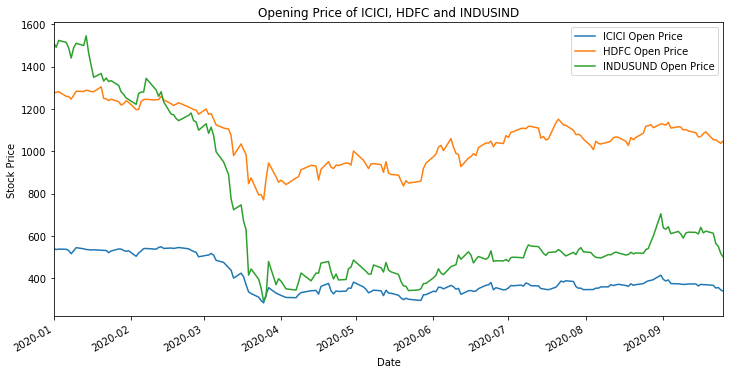

In [11]:
icici['Open'].plot(label='ICICI Open Price', figsize=(12,6))
hdfc['Open'].plot(label='HDFC Open Price')
indus['Open'].plot(label='INDUSUND Open Price')
plt.legend()
plt.title('Opening Price of ICICI, HDFC and INDUSIND')
plt.ylabel('Stock Price')
plt.show()

### Volume Traded and Interpretation

Volume represents the number of stocks, futures or options contracts, which are traded during a certain period of time, most often a day. The higher the volume, the more active the instrument we are trading is. Every unit of volume in any market reflects the actions taken by two sides: one trader buys a given share or contract and another trader sells a given share or contract.

Now we will analyse the total `volume` traded by each bank

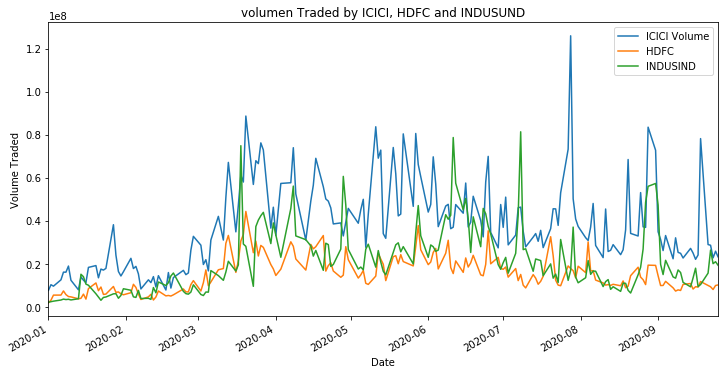

In [12]:
icici['Volume'].plot(label='ICICI Volume',figsize = (12,6))
hdfc['Volume'].plot(label='HDFC')
indus['Volume'].plot(label='INDUSIND')
plt.legend()
plt.title('volumen Traded by ICICI, HDFC and INDUSUND')
plt.ylabel('Volume Traded')
plt.show()

If we analysis the above chart, we can see that there is a spike in `icici` volume at the end of august month
let's see at which date it was happend

*To get exact date we will be using [argmax()](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)* . It returns the indices of maximum value.

In [15]:
icici['Volume'].argmax()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


Timestamp('2020-07-28 00:00:00')

In [18]:
# icici.iloc[[icici['Volume'].argmax()]]
# with this code we can easily call the row which having the date "2020-07-28"

Here we can clearly see that the spike was happen on July 28,2020.

So, to understand it we will be plotting data form July 20,2020 to July 31,2020.

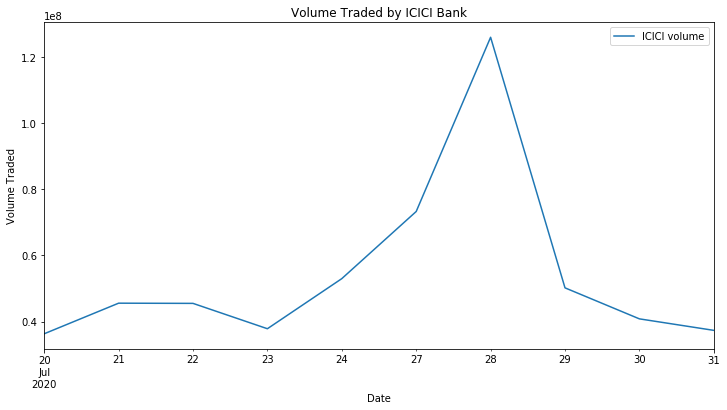

In [20]:
icici.iloc[135:145]['Volume'].plot(label='ICICI volume', figsize=(12,6))
plt.title('Volume Traded by ICICI Bank')
plt.ylabel('Volume Traded')
plt.legend()
plt.show()

In [22]:
# maximum opening price between 130 to 150 rows
icici.iloc[135:145]['Open'].argmax()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


Timestamp('2020-07-24 00:00:00')

In [23]:
# maximum volume between 130 to 150 rows
icici.iloc[135:145]['Volume'].argmax()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


Timestamp('2020-07-28 00:00:00')

Let's plot graph of same rows for `opening price` form July 13,2020 to first week of August 2020.


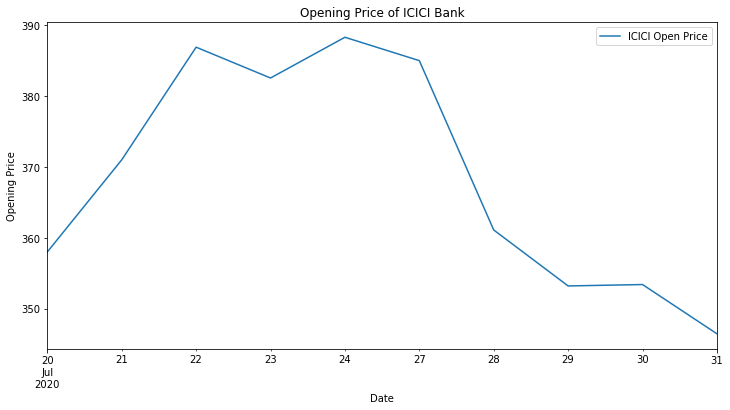

In [24]:
icici.iloc[135:145]['Open'].plot(label='ICICI Open Price', figsize=(12,6))
plt.title('Opening Price of ICICI Bank')
plt.ylabel('Opening Price')
plt.legend()
plt.show()

> After anlysing both charts of volume and price; we found that on july 28,2020 maximum volume was traded in `volume chart`.
But in `price chart` of july 28,2020, we can see there was lower price of stock compare than previous day.

> Hence can say that when `volume goes up` the `price went down`.


### Saving the work on jovian platform

In [25]:
!pip install jovian --upgrade --quiet

In [26]:
import jovian

In [28]:
jovian.commit(project = project_name, enviornment = None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vikasrajoria11ece/stock-market-analysis-using-pandas" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/vikasrajoria11ece/stock-market-analysis-using-pandas


'https://jovian.ml/vikasrajoria11ece/stock-market-analysis-using-pandas'

### Market CAP

`Market capitalization` refers to the total dollar market value of a company's outstanding shares of stock. Commonly referred to as `market cap`, it is calculated by multiplying the total number of a company's outstanding shares by the current market price of one share.

In [29]:
icici['Total Traded'] = icici['Open'] * icici['Volume']
hdfc['Total Traded'] = hdfc['Open'] * hdfc['Volume']
indus['Total Traded'] = indus['Open'] * indus['Volume']

* it not actual market cap, it's just a visual represantation of total money traded

In [30]:
icici.tail()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2020-09-25,350.500000,336.600006,339.049988,348.649994,23231600,348.649994,7.876674e+09
2020-09-28,363.950012,349.100006,351.500000,363.000000,18495592,363.000000,6.501201e+09
2020-09-29,363.750000,354.250000,363.750000,357.049988,17080848,357.049988,6.213158e+09
2020-09-30,357.500000,349.350006,356.950012,354.750000,19565058,354.750000,6.983748e+09
2020-10-01,371.200012,358.250000,358.250000,369.200012,23237122,369.200012,8.324699e+09


In [31]:
hdfc.tail()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2020-09-25,1051.949951,1025.650024,1050.000000,1044.000000,10160772,1044.000000,1.066881e+10
2020-09-28,1059.000000,1042.650024,1048.949951,1054.199951,8076211,1054.199951,8.471541e+09
2020-09-29,1069.900024,1051.000000,1058.000000,1062.550049,6322223,1062.550049,6.688912e+09
2020-09-30,1086.900024,1052.000000,1060.000000,1078.599976,9406921,1078.599976,9.971336e+09
2020-10-01,1110.000000,1090.099976,1090.099976,1106.949951,10601540,1106.949951,1.155674e+10


In [33]:
indus.tail()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2020-09-25,521.299988,491.200012,499.899994,514.849976,19311510,514.849976,9.653824e+09
2020-09-28,563.299988,516.150024,522.900024,555.099976,24396893,555.099976,1.275714e+10
2020-09-29,561.849976,528.950012,559.000000,536.250000,21321940,536.250000,1.191896e+10
2020-09-30,539.700012,520.250000,536.250000,527.400024,18784941,527.400024,1.007342e+10
2020-10-01,597.049988,537.000000,540.000000,592.200012,49858446,592.200012,2.692356e+10


Now let's go ahead and see tha actual `Total Traded Amount`

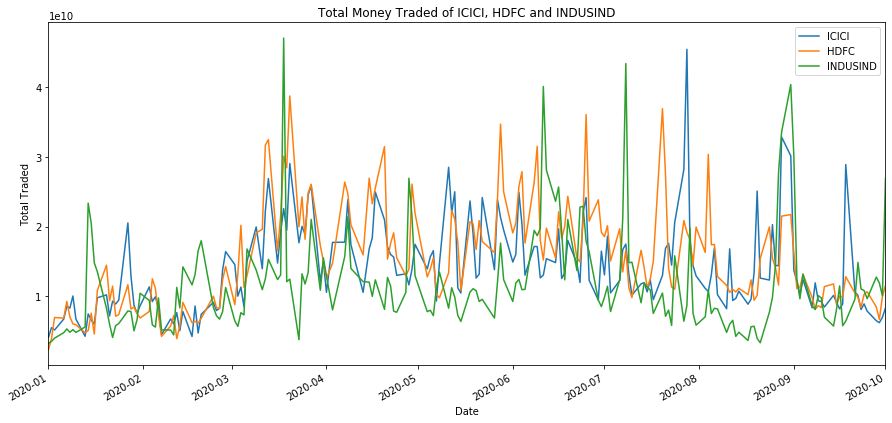

In [34]:
icici['Total Traded'].plot(label = 'ICICI', figsize = (15,7))
hdfc['Total Traded'].plot(label='HDFC')
indus['Total Traded'].plot(label='INDUSIND')
plt.title('Total Money Traded of ICICI, HDFC and INDUSIND')
plt.legend()
plt.ylabel('Total Traded')
plt.show()

In this chart we can see that huge amount of money traded in `INDUSIND Bank` compare than `ICICI` and `HDFC`. 
huge amount is traded is someother in `mid of march, June, July and September`

* to get the maximum spike, we will be again use the argamax

In [35]:
indus['Total Traded'].argmax()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


Timestamp('2020-03-18 00:00:00')

here we go it happeded on `2020-03-18`

### MOVING AVERAGE

* Moving average is a technique to get an overall idea of the trends in a data set; it is an average of any subset of numbers
* Moving averages is the method to make your data more reliable and more robust
* MA is best practice that `Analyzers` use when studing certain `trends`.
* Moving average can be calculated for specific interval of time, say `20 days`, `50 days`, `100 days` and so on.

In [36]:
indus['MA50'] = indus['Open'].rolling(50).mean()
indus['MA100'] = indus['Open'].rolling(100).mean()
indus['MA150'] = indus['Open'].rolling(150).mean()

In [37]:
# indus['MA200'] = indus['MA150']
# indus['MA200'] = indus['MA150']
# indus.rename(columns={'MA150':'MA100','MA180':'MA150'}, inplace= True)

In [38]:
indus.tail()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA100,MA150
Date,,,,,,,,,,
2020-09-25,521.299988,491.200012,499.899994,514.849976,19311510,514.849976,9.653824e+09,556.756000,510.2985,550.201000
2020-09-28,563.299988,516.150024,522.900024,555.099976,24396893,555.099976,1.275714e+10,556.715001,510.8975,545.987000
2020-09-29,561.849976,528.950012,559.000000,536.250000,21321940,536.250000,1.191896e+10,557.181000,511.9875,542.080000
2020-09-30,539.700012,520.250000,536.250000,527.400024,18784941,527.400024,1.007342e+10,557.346000,513.0520,537.855000
2020-10-01,597.049988,537.000000,540.000000,592.200012,49858446,592.200012,2.692356e+10,557.836000,513.7020,533.581667


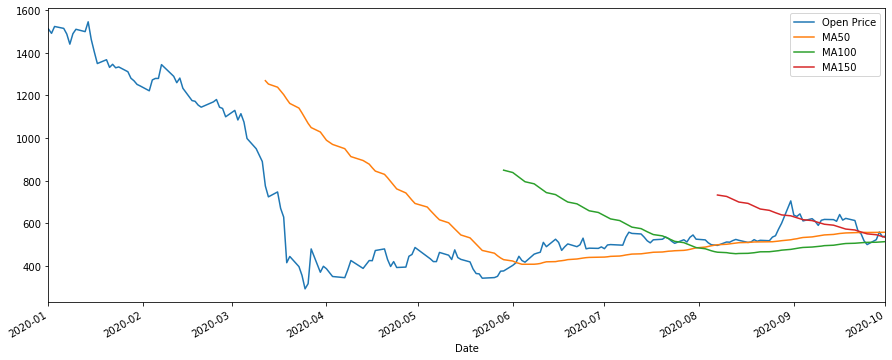

In [39]:
# let's plot between `MA50` and `Open price`
indus['Open'].plot(label='Open Price',figsize = (15,6))
indus['MA50'].plot(label='MA50')
indus['MA100'].plot(label='MA100')
indus['MA150'].plot(label='MA150')
plt.legend()

### Correlation and Scaller Matrix

`Correlation` is a statistical technique that can show whether and how strongly pairs of variables are related. For example, height and weight are related; taller people tend to be heavier than shorter people. The relationship isn't perfect. 

first thing i am going to install `pandas scatter matrix`

In [40]:
from pandas.plotting import scatter_matrix

now i am going to `concat` the `opening price` of `ICICI`, `HDFC` and `INDUSIND`

In [41]:
bank = pd.concat([icici['Open'],hdfc['Open'],indus['Open']], axis = 1)

let me give some column name in new dataframe

In [42]:
bank.columns = ['ICICI Open','HDFC Open','INDUSIND Open']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f588b77b4d0>,
      dtype=object)

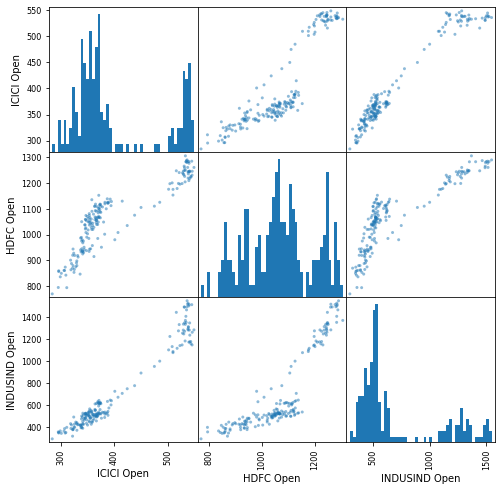

In [43]:
# Now let's plot scatter matrix of banks
# scatter_matrix(bank, figsize=(8,8))
# if you want more histogram bins than just use "hist_kwds={'bins':50}"
scatter_matrix(bank, figsize=(8,8),hist_kwds={'bins':50})

By this scatter matrix we can see `linear correlation` between `ICICI, HDFC and INdUS Ind`

* we can see the straight line in between `HDFC and INDUSIND`, `ICICI and HDFC` and `ICICI and INDUSIND` and vice versa; which shows positive relationship.

>NOTE:- In scatter matrix the straigh line shows the perfect coorelation

### Daily percentage change

Percentage change is a simple mathematical concept that represents the degree of change over time. It is used for many purposes in finance, often to represent the price change of a security. It can be calculated by below formula.

* This formula returns the %gain or loss

>Return = (Today's Closing price/ Yesterday's closing price)-1

It could be also refered as `Today's retruns = percentage change`

In [44]:
icici['retruns'] = (icici['Close']/icici['Close'].shift(1)) -1 

In [45]:
icici.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,retruns
Date,,,,,,,,
2020-01-01,542.500000,535.700012,539.900024,536.750000,7642793,536.750000,4.126344e+09,NaN
2020-01-02,541.900024,535.849976,536.000000,540.599976,10264223,540.599976,5.501624e+09,0.007173
2020-01-03,540.799988,536.250000,538.000000,538.849976,9594690,538.849976,5.161943e+09,-0.003237
2020-01-06,537.250000,523.799988,537.250000,525.700012,12534334,525.700012,6.734071e+09,-0.024404
2020-01-07,535.599976,521.650024,531.299988,522.900024,16101835,522.900024,8.554905e+09,-0.005326


of course the first entry will be `NAN` because there is nothing before

* It cannot be divided by someting that does not exists,thats why we got `NAN` here.

## Asking and Answering Questions

#### Q1. Find out the date on which maximum volume of hdfc was traded.

In [46]:
# to get the maximum value we can simply use afrmax()
hdfc['Volume'].argmax()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


Timestamp('2020-03-20 00:00:00')

#### Q2. Find out the total Market Cap of `Indusind Bank` and display the values of last 5 days. 

In [47]:
indus['Total Traded'] = indus['Open'] * indus['Volume']

In [48]:
indus[['Total Traded']].tail()

,Total Traded
Date,
2020-09-25,9.653824e+09
2020-09-28,1.275714e+10
2020-09-29,1.191896e+10
2020-09-30,1.007342e+10
2020-10-01,2.692356e+10


#### Q3. Calculate the `Moving average` for 50 days and 150 days.

In [49]:
indus['MA50'] = indus['Open'].rolling(50).mean()
indus['MA150'] = indus['Open'].rolling(150).mean()

In [50]:
indus[['MA50','MA150']].tail()

,MA50,MA150
Date,,
2020-09-25,556.756000,550.201000
2020-09-28,556.715001,545.987000
2020-09-29,557.181000,542.080000
2020-09-30,557.346000,537.855000
2020-10-01,557.836000,533.581667


#### Q4. Plot a histogram of daily percentage change in Hdfc stock price.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f583ae476d0>]],
      dtype=object)

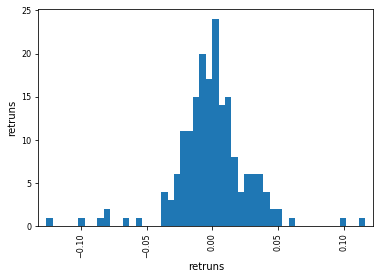

In [51]:
hdfc['retruns'] = (hdfc['Close']/hdfc['Close'].shift(1)) -1 
hdfc_change = hdfc[['retruns']]
scatter_matrix(hdfc_change,hist_kwds={'bins':50})

#### Q5. Find out the stock whose closing price was fallen drastically.

Text(0, 0.5, 'Stock Price')

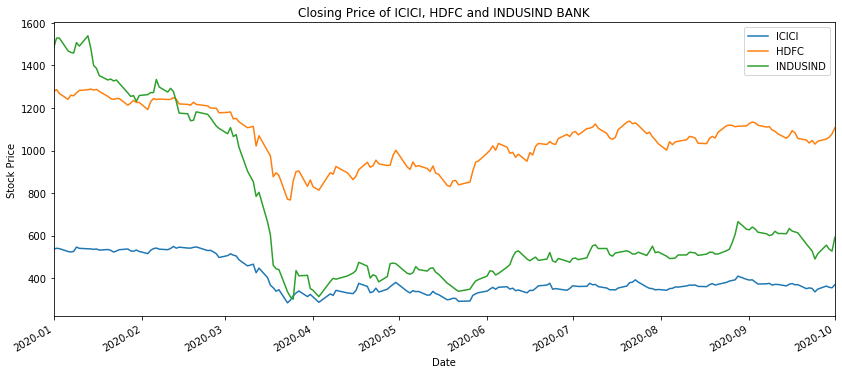

In [52]:
icici['Close'].plot(label='ICICI',figsize=(14,6))
hdfc['Close'].plot(label='HDFC')
indus['Close'].plot(label='INDUSIND')
plt.legend()
plt.title('Closing Price of ICICI, HDFC and INDUSIND BANK')
plt.ylabel('Stock Price')

After analysing the above chart we can say that `INDUSIND Bank's` closing price was dropped.

#### Q6. Find out which stock provides highest return till sep,25,2020.

In [53]:
icici['retruns'] = (icici['Close']/icici['Close'].shift(1)) -1 
hdfc['retruns'] = (hdfc['Close']/hdfc['Close'].shift(1)) -1 
indus['retruns'] = (indus['Close']/indus['Close'].shift(1)) -1 

In [54]:
bank_return = pd.concat([icici['retruns'],hdfc['retruns'],indus['retruns']], axis = 1)

In [55]:
bank_return.columns = ['ICICI Return','HDFC Return','INDUSIND Return']

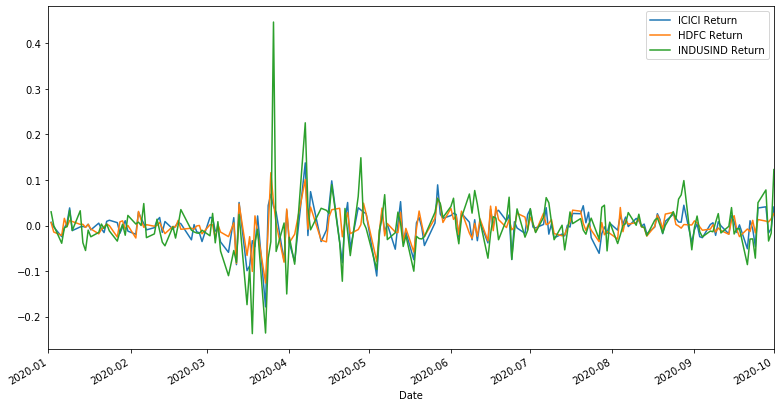

In [56]:
bank_return.plot(figsize = (13,7))

>On the basis of above chart we can see the `INDUSIND Bank` is giving highest return since end of the March-2020 to Sep,25,2020.

In [ ]:
jovian.commit(project = project_name, enviornment = None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## Inferences and Conclusion

We've drawn many interesting inferences from the analysis, here's a summary of the few of them:

* Based on the analysis in opening prices, we can say that the analysis is showing the covid-impact on overall share market in the first quarter.
* We can see the prices were suddenly fallen down at the end of march-2020 except `INDUSIND` whose price started dropin form Feb-2020
* since the price goes down the Traded volume was increased in each month for all three stocks, as we can see the mostly traded stock was `INDUSIND` and `ICICI`.
* The Largest `Market Cap` is holded by `ICICI Bank` in every month after april, and it also has a spike in every motnth. On the other hand there is volatility in `HDFC` and `INDUSIND` Bank.
* Although the price was changing every day but there is a stong correlation between opening prices of all three stocks.
* We have also seen that if someone has invested into `INDUSIND BANK`, then he could receive `good retrun` compare than other banks

### References and Future Work

There's a lot's of information can be discovered using the dataset, and we've barely scratched the surface.Here are some ideas for further exploration:

* Analysis the closing price, high and low prices all three stocks as well
* Download the dfferent dataset and can repeat the all steps
* Compare the current years stock price with previous year

References: 

* Pandas- DataReader guide: https://pandas-datareader.readthedocs.io
* Datetime guide: https://docs.python.org/3/library/datetime.html
* Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
* Live stock Data: https://finance.yahoo.com
* Moving Averages and Percentage Change: https://www.investopedia.com
* Correlaton guide: https://www.surveysystem.com

As a next step, you can try out my upcoming project `Stock analysis using LSTM` and other interesting projects on: https://jovian.ml/vikasrajoria11ece

You can also find this project on colab:- https://colab.research.google.com/drive/1i7fnjFHkgXujl2Ws-9THvULmfOjYbeus

`And you can also find me on Linkedin:` https://linkedin.com/in/vikas-rajoria-43681368